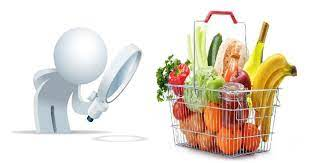

# <font color= green>Market Basket Analysis Of Customer Online Purchases
Online shopping offers customers a selection of products to browse through. But with too many choices, customers might not quickly find what interests them or what they are looking for, and eventually, they might not make a purchase. To enhance the shopping experience, product recommendations are important. Product recommendations can help customers make decisions that matter to them. More importantly, helping customers make the right choices also has positive implications for environmental sustainability, as it reduces returns, and thereby minimizes emissions from transportation of products from one location to the next. My third capstone will focus on performing a market basket analysis on customer transactions.

Market basket analysis, MBA, is a processs that examines the relationships among entities and objects that frequently appear together. In context of ecommerce, MBA looks for collections of items bought frequently to identify which items go together. With large amounts of data available, the discovery of interesting relationships within customer transactions can be uncovered. This discovery can help many online businesses in decision making processes such as upsell, cross-sell, and bundling opportunities.

# <font color=green>1. Data</font>
The University of California Irvine, UCI, hosts a machine learning repository. This data is popular among data scientists and machine learning researchers. It has existed since 1987 and contains 601 datasets to this day. Students and researchers in artificial intelligence and machine learning community have used datasets from the repository to facilitate the publication of numerous articles.
The data used for this capstone was donated in 2015 by an online retail store in the UK. It contains observational data of purchases between 2010 and 2011 of anonymous customers. 

[Online Retail Dataset](https://archive-beta.ics.uci.edu/ml/datasets/online+retail)
\
[Online Retail Dataset II](https://archive-beta.ics.uci.edu/ml/datasets/online+retail+ii)

# <font color=green>2. Data Wrangling</font>
[Data Wrangling Notebook](https://github.com/JideOkesanjo/DataScience-Capstone-Projects/blob/main/Data_Wrangling_EDA_Capstone_Project.ipynb)

The data contains OrderID and CustomerID columns for customers. The strategy of this capstone was wrangle the data in a way that exploratory data analysis and then eventually association rule mining can be done on both orderid and customerid. CustomerID was changed to interger from float data type. There were a few challenges that I encountered
- __Missing CustomerIDs__: Almost 25% of <font>_CustomerID_</font> column was missing. Upon further investigation, I noticed that the rows were not missing at random. They appear to be orders placed by unknown customers. I choose to  separate the unknown customers from the known ones. Exploratory data analysis and modelling was done on the dataframe containing CustomerIDs.
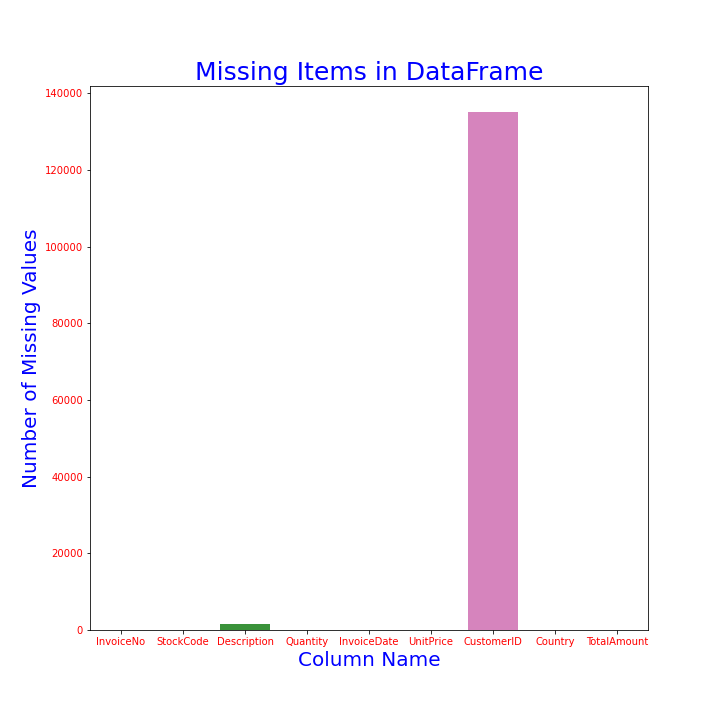


- __Free Items, Billing and Price Adjustments__: A small portion of the data contained rows that reflected billing and price adjustments to accomodate customers. These rows were indicated in the description column by the letter <font>_'M'_</font> for manual adjustment, <font> _'Discount'_</font> for discount applied, and <font>_'POSTAGE'_</font> for delivery charges. Since the goal of the project was to look at what items customers purchased, these rows were removed before EDA and Modelling.

- __Questionable Quantities__: A number of rows in the dataframe contained unexplained negative quantities. These were also removed from the dataset. Further investigation revealed these were items either returned or eventually returned.



# <font color=green>3. Exploratory Data Analysis</font>
[EDA Report](https://github.com/JideOkesanjo/DataScience-Capstone-Projects/blob/main/Data_Wrangling_EDA_Capstone_Project.ipynb)

## Country With Most Customers
The top five customers in dataset came from the united kingdom. This is no surprise given that the dataset was donated from a company in the United Kingdom. The data contained almost 4000 unique customers from the UK. This is interesting considering the fact that the dataset contains over 400,000 rows. It implies that UK customers are the most returning customers that the store has.
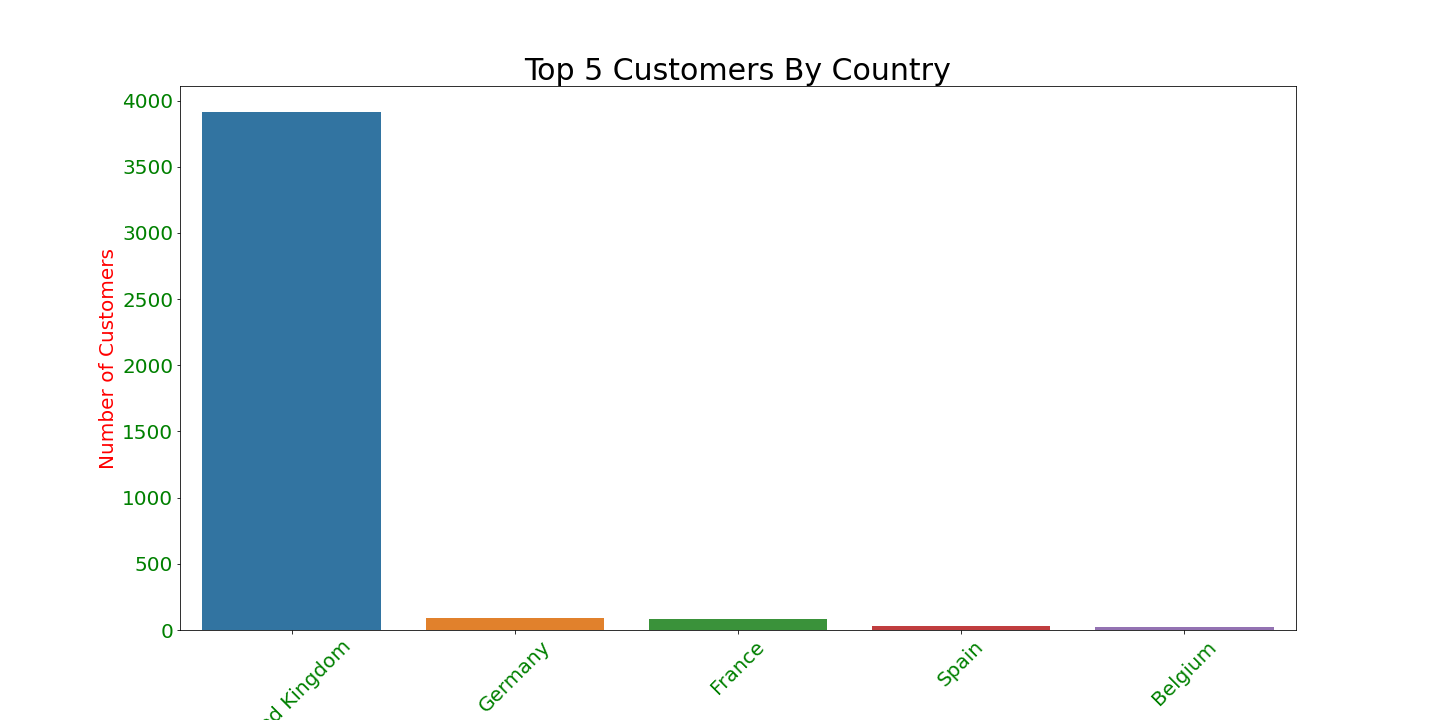

## Most Popular Item Ordered
The most popular item ordered was the white hanging heart tealight holder, a structure used to hold a candle. Candle sets are gender-neutral and great for any occasion. It is possible that these particular purchases were made to be gifted to friends and loved ones on special occasions. If the store also sells candle sticks, it would be beneficial to customers and the store to place tealight holders and candle sticks together. Coming in second was the red retrospot, a multipurpose bag used for storing items or carrying items on the go. 
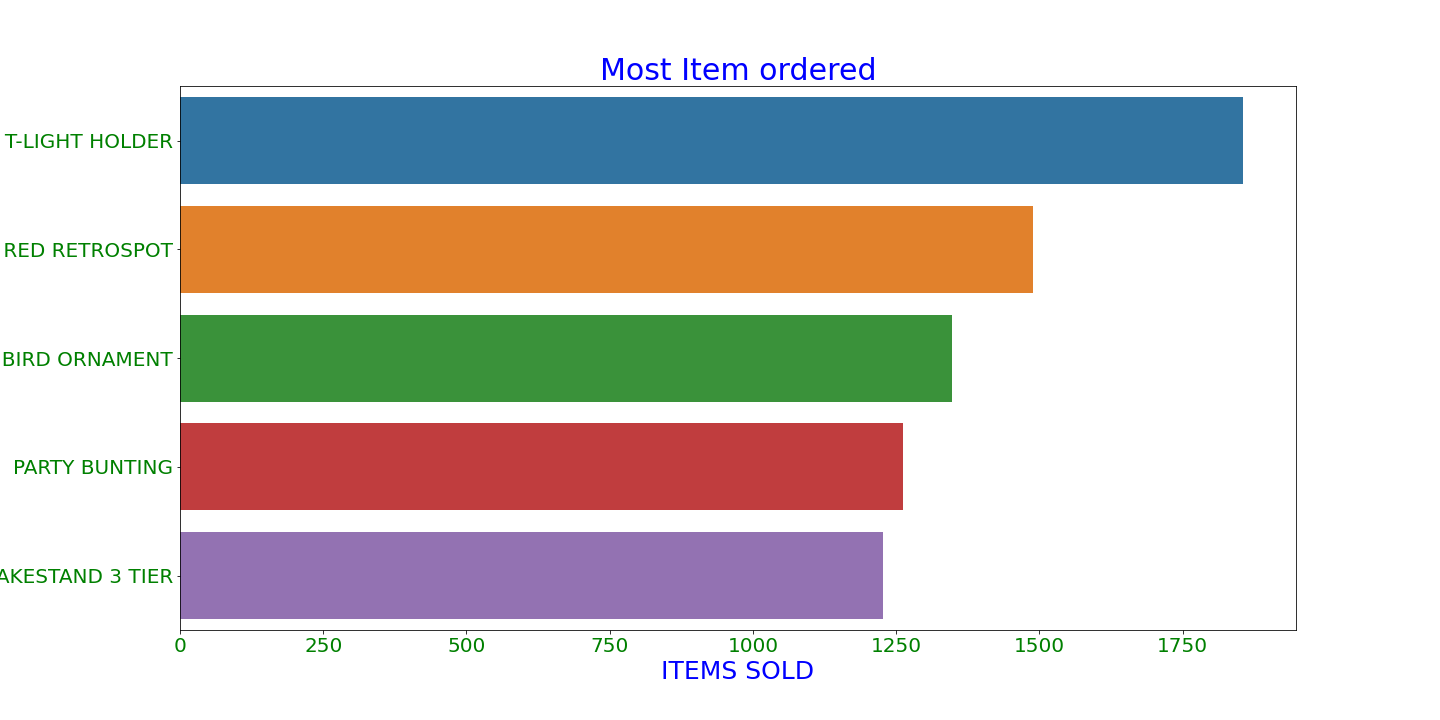

## Average Holiday Sales
A two sample t-test was used to compare the average sales of holiday sales in 2010 and 2011. Any items purchased in November and December were considered holiday sales. Average sales on any day between November and December 2010 was about 28 Euros, while the mean sales on holiday 2011 was about 38 Euros. Altough December 2011 had higher average sales than December 2010, according the t-test results, the average sales were not significant. In other words, average sales from both holiday years were about the same. These two values have interesting implications. Since there are only 27 items in the store that cost more than 38 Euros, it could be that customers are buying at one item or more multiple items. Because during the holiday season people mostly buy gifts for more than one person, it is more likely that customers were shopping for more than one item.
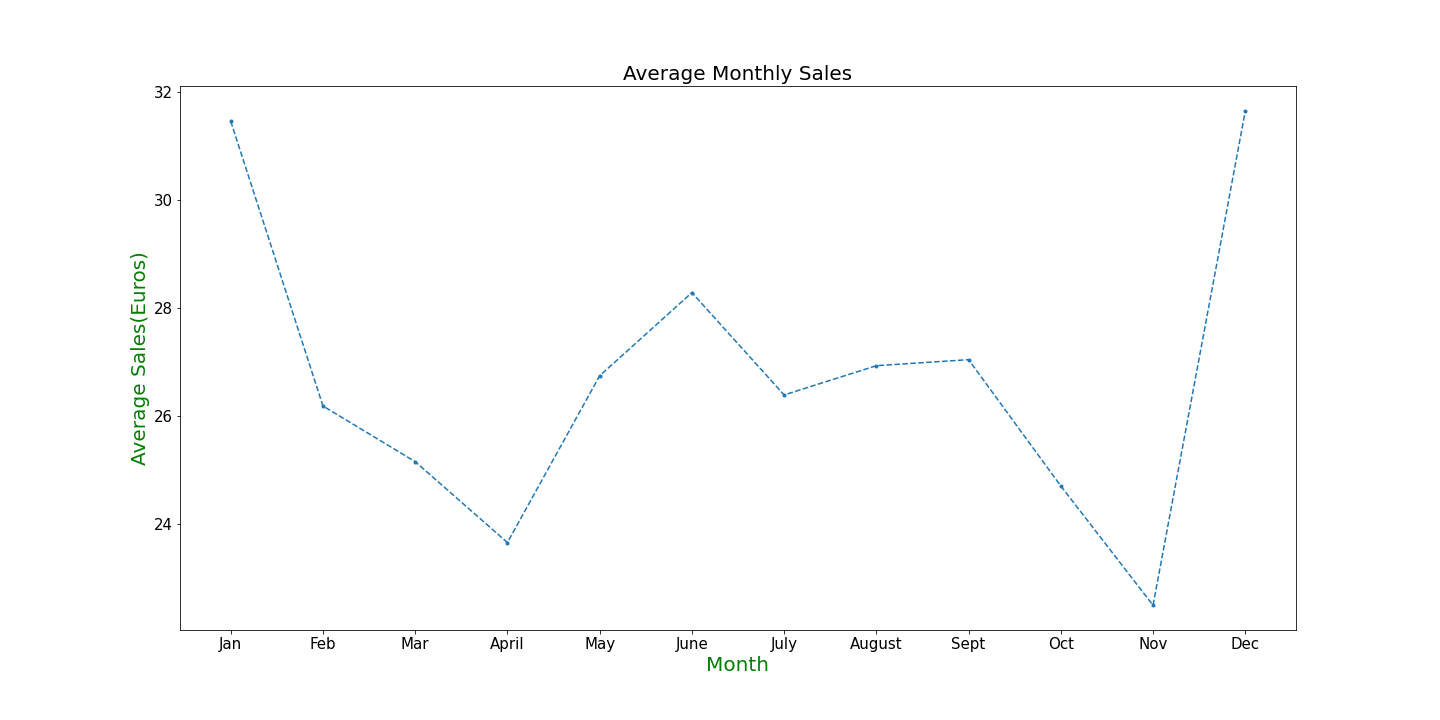



## Another Look At Canceled Items
The top five cancelled or returned items were _manual_, _regency cakestand_, _postage_, _check_, and _jam making set with jars_. It was unclear what _manual_ and _check_ means within the context of the dataset. It's possible the items were damaged on delivery. It also plausible that customers just didn't like the items. More features about the quality and rating of the items would be needed to understand why _regency cakestand_ and _jam making set with jars_ were cancelled;
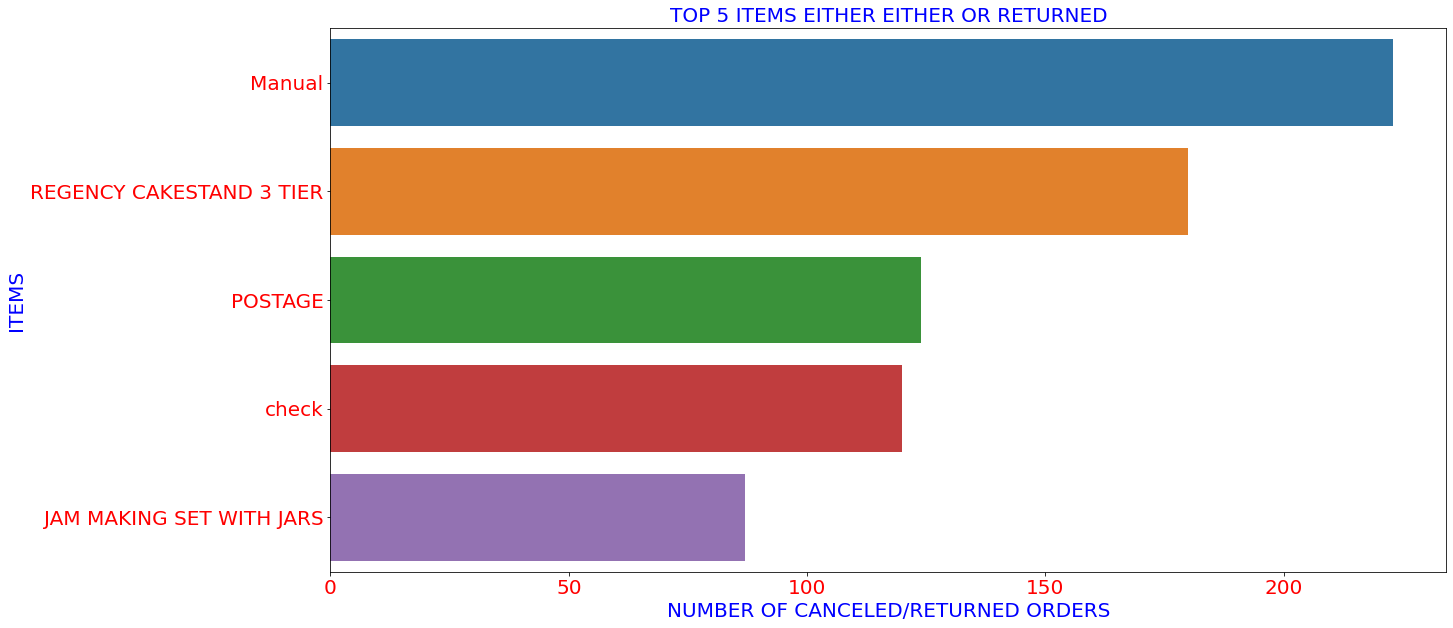


# <font color=green> 4. Preprocessing
[Preprocessing & Modeling Notebook](https://github.com/JideOkesanjo/DataScience-Capstone-Projects/blob/main/Preprocessing_And_Modeling_Casptone_Project.ipynb)

Description column was changed to string data type. Strip method was used to remove any whitespacing that may have existed within each string in the column. Removing whitespaces was very important as the algorithm could misconstrue two identical words with inconsistent spacing as different entities. A new dataframe was also created, grouping CustomerID, Description and Quantity columns together. One hot encoding was performed on the entire new dataframe. The data frame was filtered to include only customers who made more than one purchase. 

# <font color=green>5. Modeling

The first step in market basket analysis is to extract rules that showed which products were frequently bought together. For example, online purchases of candlesticks might conicide with purchases of candels in the same virtual basket. 
Apriori algorithm was used to analyse each customers in the dataset. The algorithm assumes that any subset of a frequent itemset must be frequent. Market basket analysis is based on the apriori algorithm. 





Any data mining algorithm has the potential to produce thousands if not millions of interesting patterns. However, it is not efficient for the apriori algorithm to do so. A retailer needs to know whether there is enough evidence to show that purchases of certain items or itemsets will result in a beneficial outcome for itself and its customers. User-defined parameters or measures of interestingness are used to focus on searching for patterns in each customers' transaction. Support, confidence, and lift are three of the most popular measures of interestingness. 
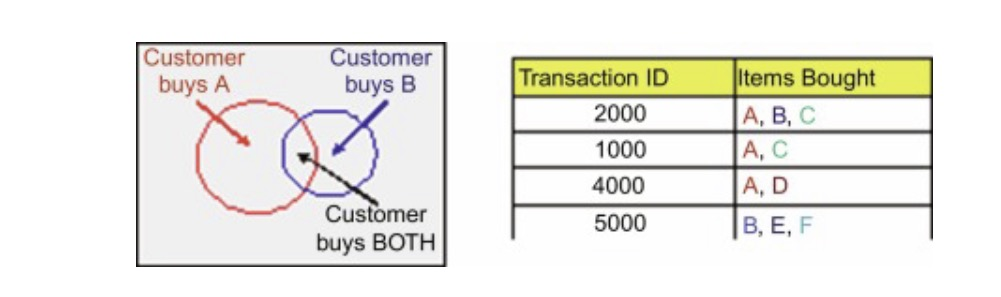

Support is the popularity of an item. It is the ratio of the number of transactions involving an item to the total number of transactions in the entire store. In context of the dataset, if white and green t-light holder had a support of 3%, then this would mean that in 3 out of every 100 transactions a white t-light holder was purchased. The higher the support the more frequently the itemset (e.g., white and green t-light holder) occurs. Rules with high support are favorable because they are likely to generalizable to a large number of future transactions.
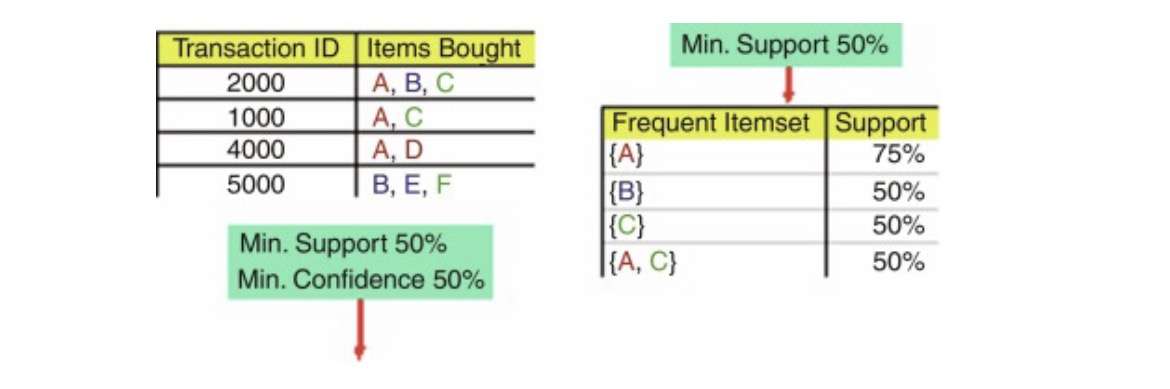


Confidence is the probabilty that a customer who bought item A and B, the antecedent (in our above example, white and green t-light holder) also contains the consequent, an item C. The larger the confidence, the better likelihood that item C, the consequent will be purchased. 

Lift is the probability of every item in association rules occuring at the same time divided by the product of the probabilities of the items (antecedent and consequent) occuring as though there was no relationship between them. In simpler terms, lift measures whether the sale of item A and B will lead to an increase in the sale of item C. A lift score greater than 1 suggests that a shopping basket that contains item A anb B increases the probabilty of sales of item C. Lift shows the strength of association between the antecedent and the consequent. The greater the lift score the stronger the association between the two products
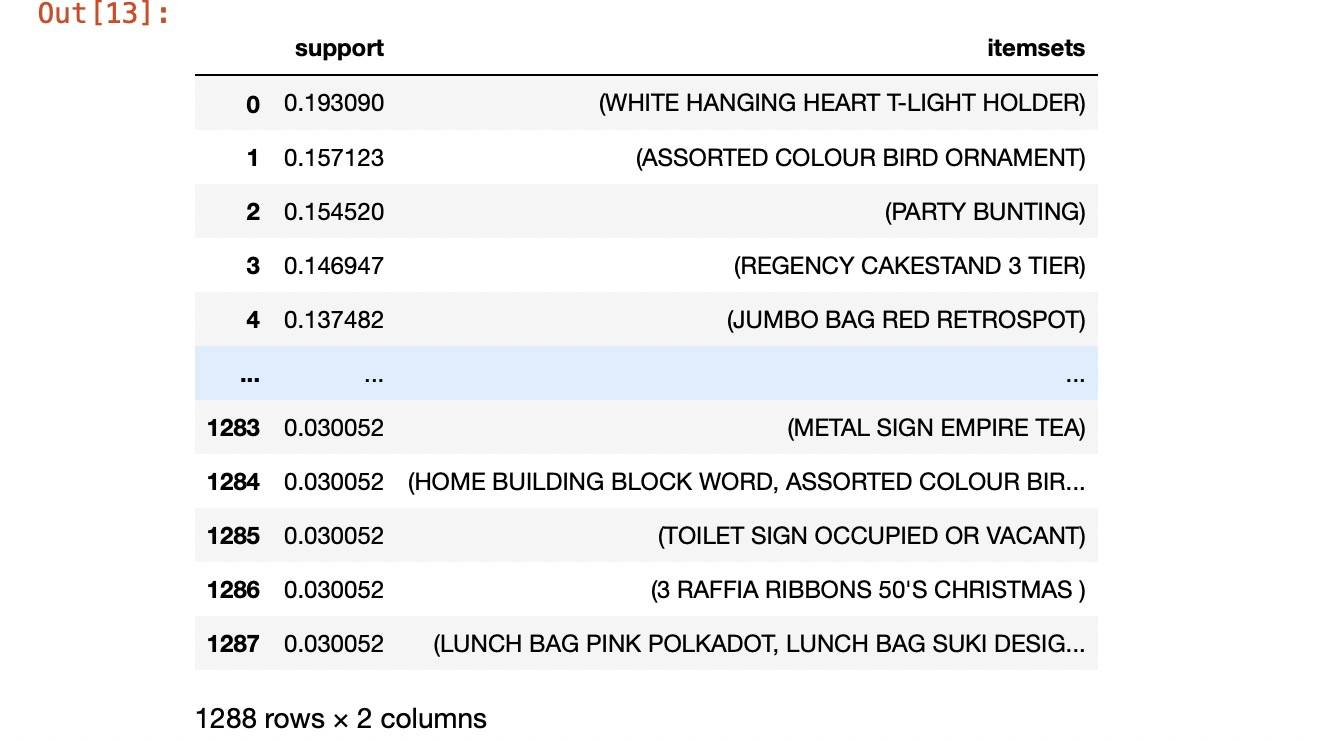

# <font color='green'>6. Results
    

Although the white hanging light holder had the highest support, it did not have the highest lift. People who bought this bought this product were more likely to buy the regency tea and saucer set. However, the relationship between both of these items was relatively weak, with lift scores close to 0. The order or sequence of purchases played an interesting role in recommendations for the next items. People who purchased the green regency tea and saucer set tended to buy the same set in a different color. The relationship between these purchases was very strong with a lift score greater than 20. The same theme can be observed in with the alarm clock items. Though the lift scores for the alarm clock item was just above 10, customers who bought this item tended to buy the same clock in a different color. Placing items that come in different colors within proximity would prove a high benefit to the online store and its customers. 
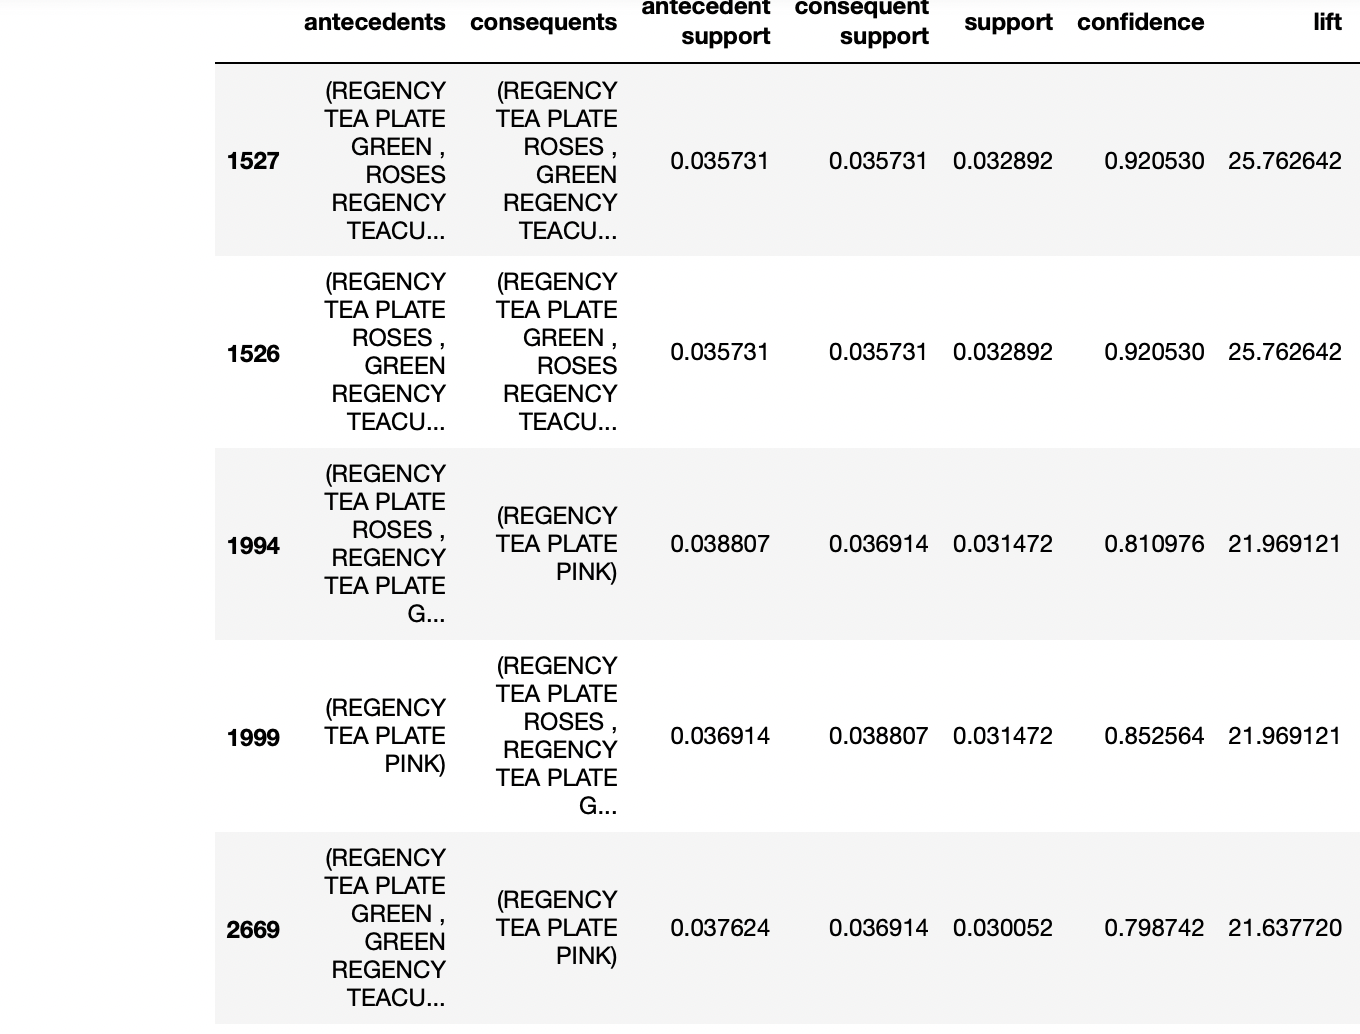

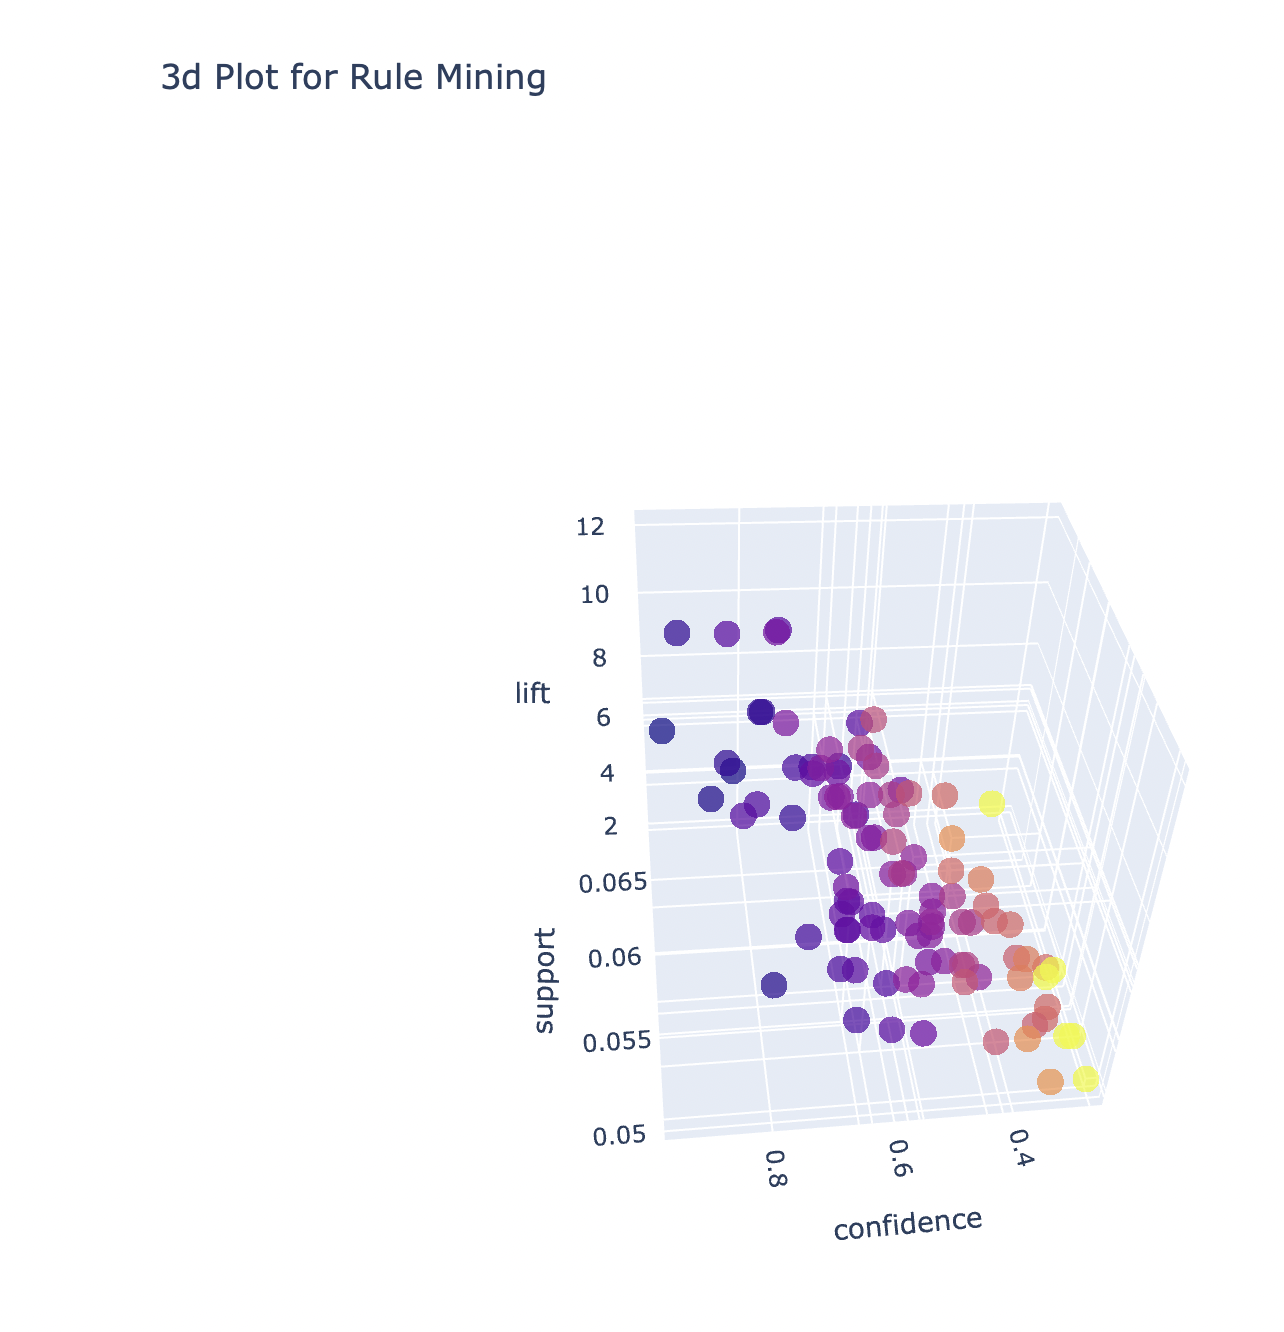

# <font color='green'>7. Limitations

- Frequent itemset generation involved in market basket analysis is computationally expensive. The apriori algorithm relies on the assumption that the transactions scanned are permanent in memory. 
- The algorithm learns from items purchased from customers not the customers themselves. Perhaps more insight could be gained from learning from the users, which is what collaborative filtering, a popular recommender system, does.
- Because this is an unsupervised learning method, it was also difficult to evaluate how the model performed in recommending itemsets because support values are typically adjusted by someone with vast domain knowledge on the subject at hand. 

# <font color='green'>8. Future Improvements

If I  have more time on this project, I would have enjoyed improving the model by using
- __Sampling:__ lowering the support threshold to examine completedness. Although high support thresholds lead to high lift scores in my model. In my preliminary model, a lower threshold revealed useful insight on itemsets with lift scores of at least 1.
- __A More Effective Itemset Counting:__ New transaction would only be added if subsets are estimated to frequent.

# <font color='green'> 9. Credits

Huge thanks to R. Agrawal and R Srinkant for creating the apriori algorithm used in this project. I am also very grateful to Raghunandan Patthar for being an amazing mentor.